# 기본적인 영상처리 기법

## 컬러 영상과 색 공간
- OpenCV와 컬러 영상
    - 컬러 영상은 3차원 numpy.ndarray로 표현. img.shape = (h,w,3)
    - OpenCV에서는 RGB 순서가 아니라 BGR 순서를 기본으로 사용

- RGB 색 공간
    - 빛의 삼원색인 빨간색(R), 녹색(G), 파란색(B)을 혼합하여 색상을 표현 (가산 혼합)
    - TV & 모니터, 카메라 센서 Bayer 필터, 비트맵

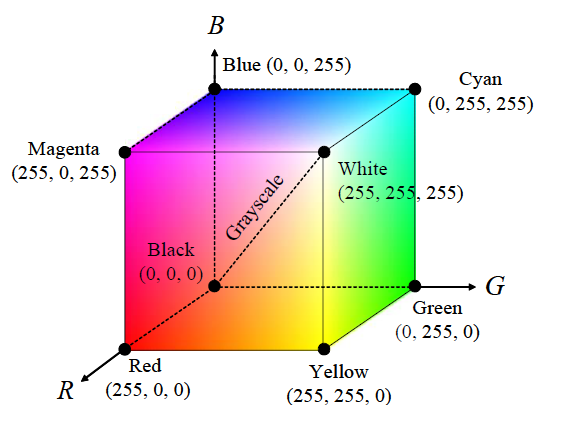

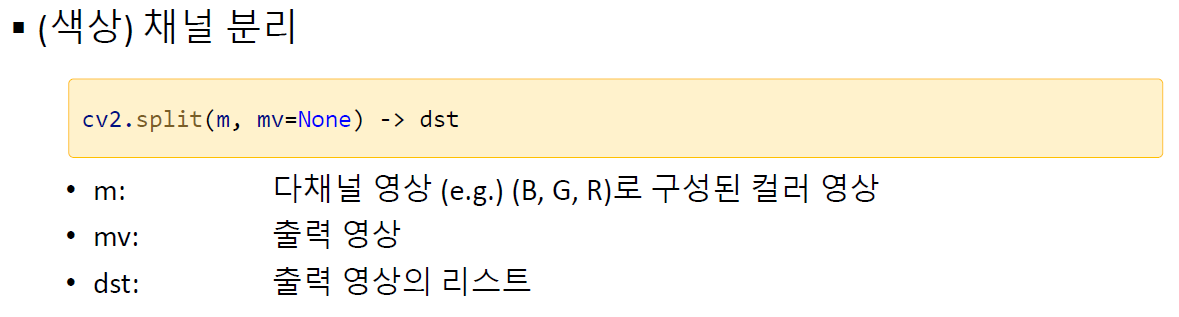

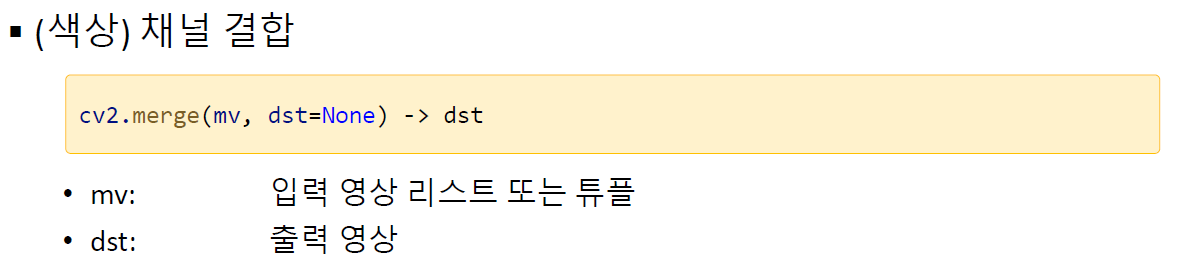

In [ ]:
# base_dir
bd = "/content/drive/MyDrive/New_Colab/src/opencv/ch03/"

In [ ]:
import sys
import cv2
import numpy as np

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
# 컬러 영상 불러오기
src = cv2.imread(bd+'candies.png', cv2.IMREAD_COLOR)

if src is None:
    print("Image load failed!")
    sys.exit()

In [ ]:
# 컬러 영상 속성 확인
print('src.shape : ', src.shape) # src.shape : (480, 640, 3)
print('src.dtype : ', src.dtype) # src.dtype : uint8

src.shape :  (480, 640, 3)
src.dtype :  uint8


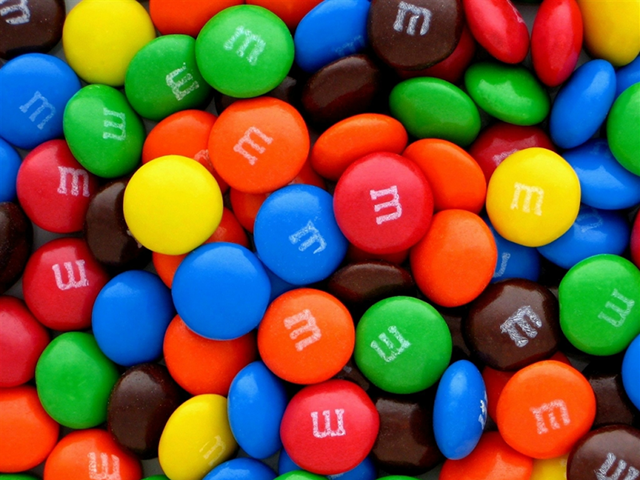

In [ ]:
cv2_imshow(src)
cv2.waitKey()
cv2.destroyAllWindows()

### 성분으로 색 영역 분할

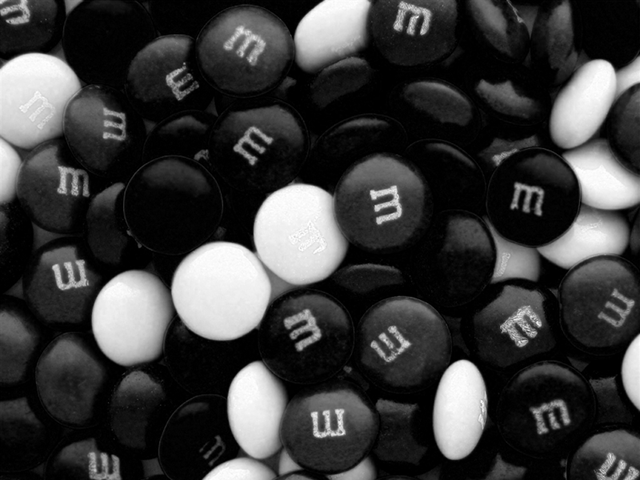

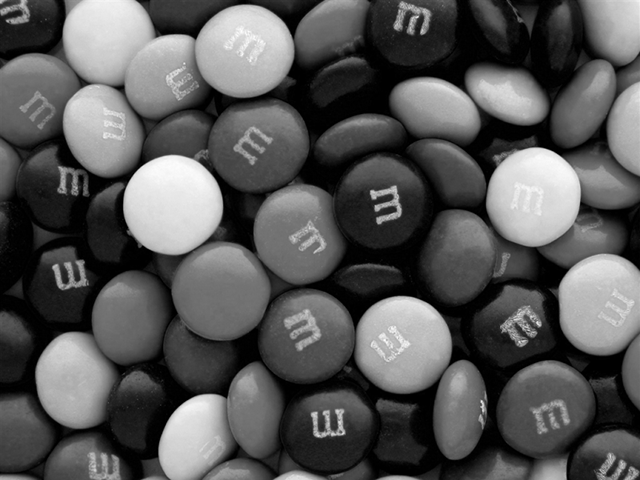

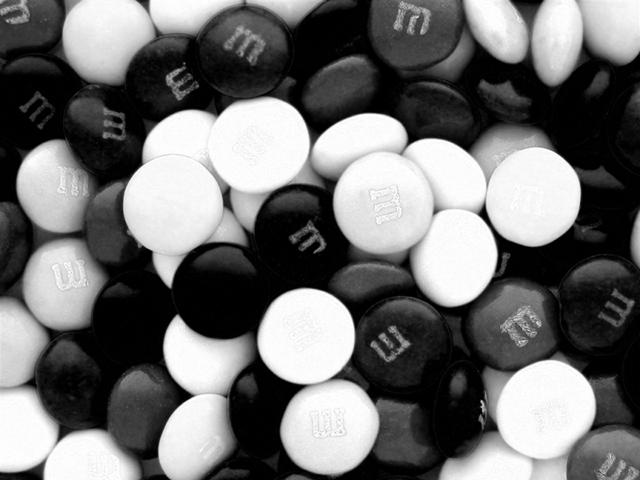

In [ ]:
# R, G, B 로 나누기
planes = cv2.split(src)

cv2_imshow(planes[0]) # Blue
cv2_imshow(planes[1]) # Green
cv2_imshow(planes[2]) # Red
cv2.waitKey()
cv2.destroyAllWindows()

### 색 공간 변환
- 영상 처리에서는 특정한 목적을 위해 RGB 색 공간을 HSV, YCrCb, Grayscale 등의 색 공간으로 변환하여 처리
- RGB 컬러 스페이스보단 다른 색영역으로 변환하여 쓰는게 일반적 

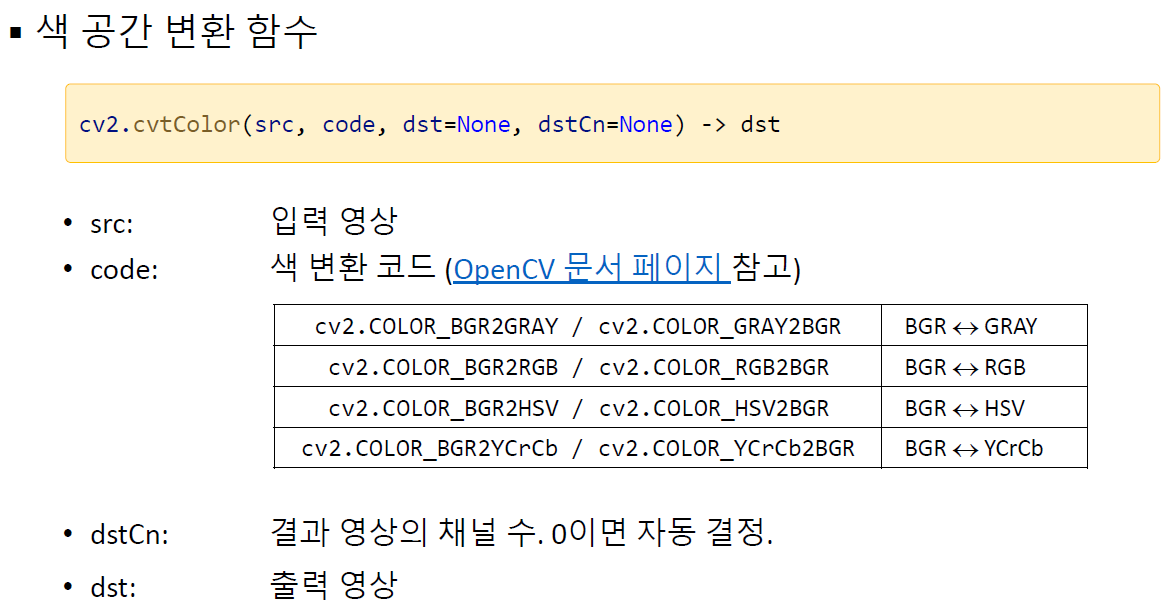

#### RGB to Grayscale 변환
- $ Y = 0.299R + 0.587G + 0.114B $
- 장점 : 데이터 저장 용량 감소, 데이터 처리 속도 향상
- 단점 : 색상 정보 손실


- 컬러 영상이 굳이 필요 없을 경우, 속도 향상과 메모리 절약이 된다

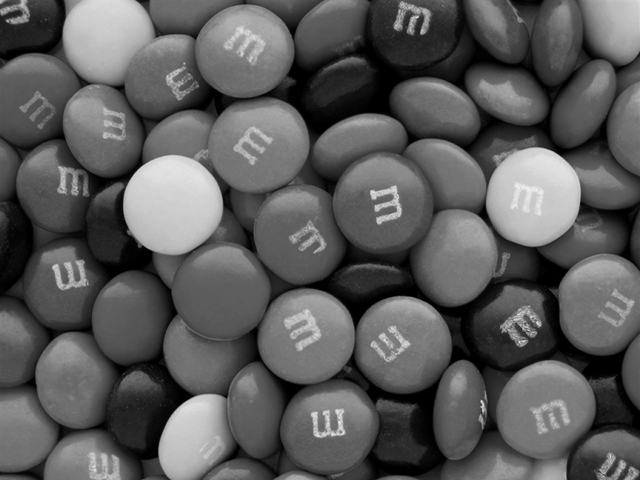

In [ ]:
new_src = planes[2] * 0.299 + planes[1] * 0.587 + planes[0] * 0.114
cv2_imshow(new_src)
cv2.waitKey()
cv2.destroyAllWindows()

#### HSV 색 공간

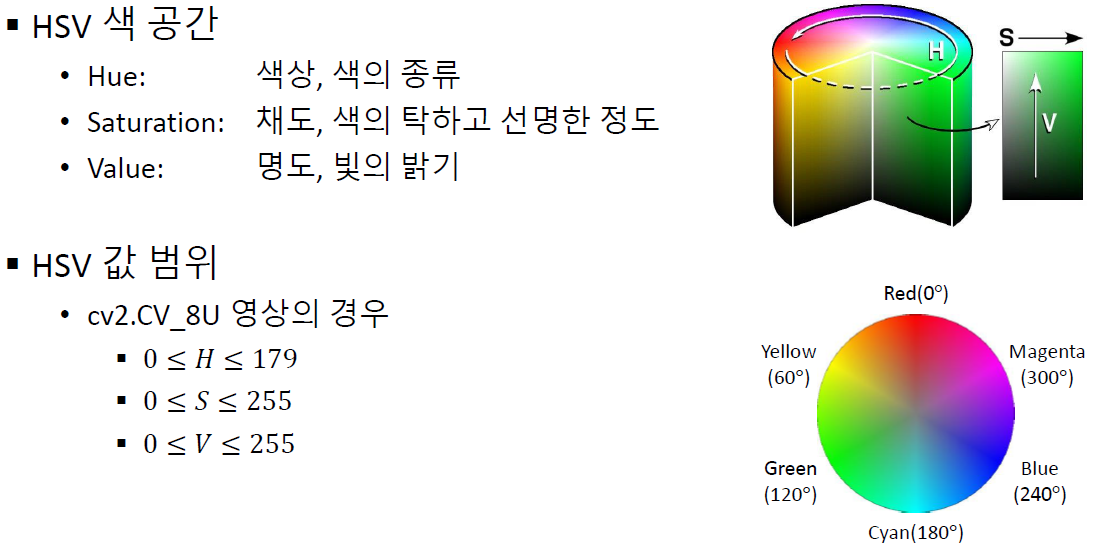

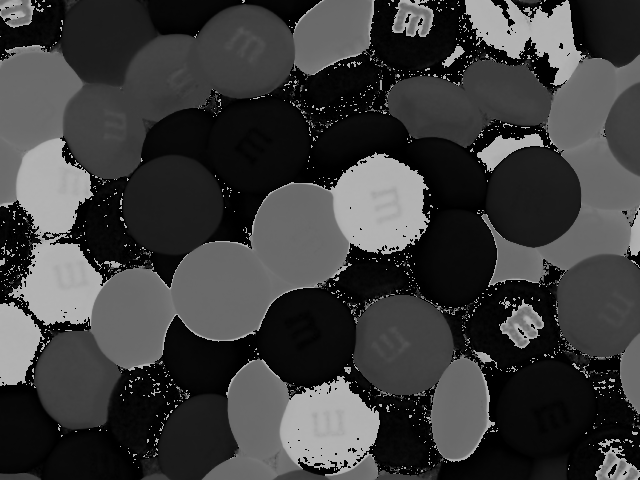

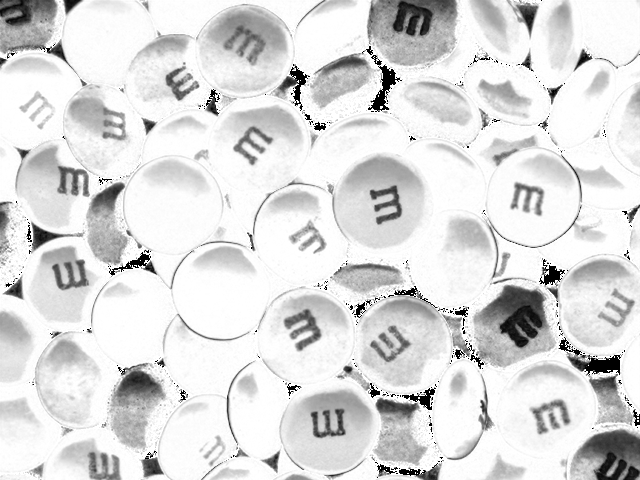

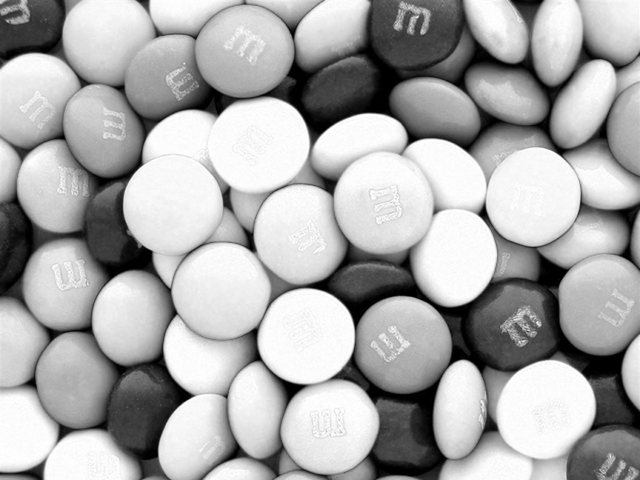

In [ ]:
src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
planes1 = cv2.split(src_hsv)
cv2_imshow(planes1[0]) # H
cv2_imshow(planes1[1]) # S
cv2_imshow(planes1[2]) # V
cv2.waitKey()
cv2.destroyAllWindows()

#### YCrCb 색 공간

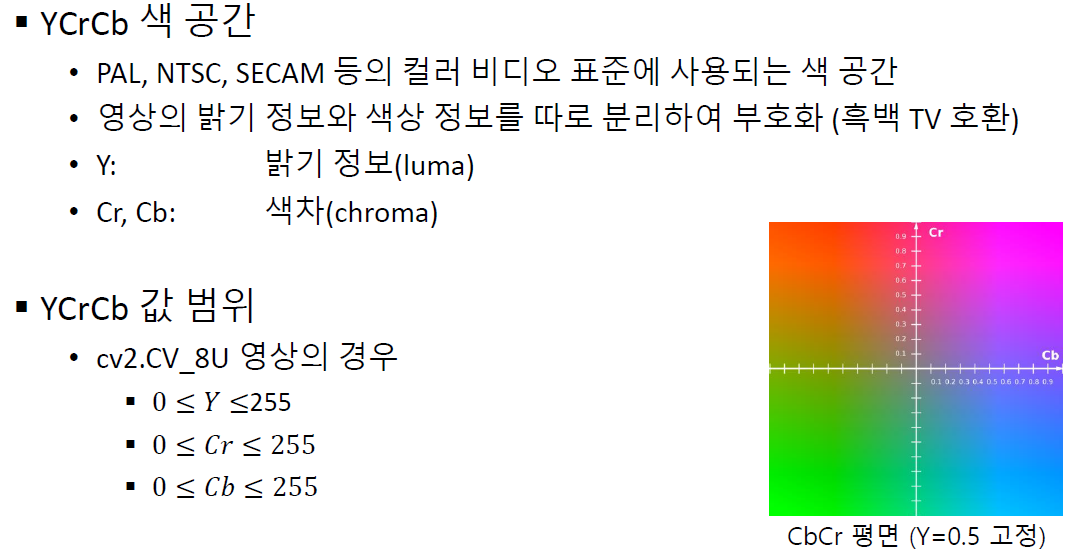

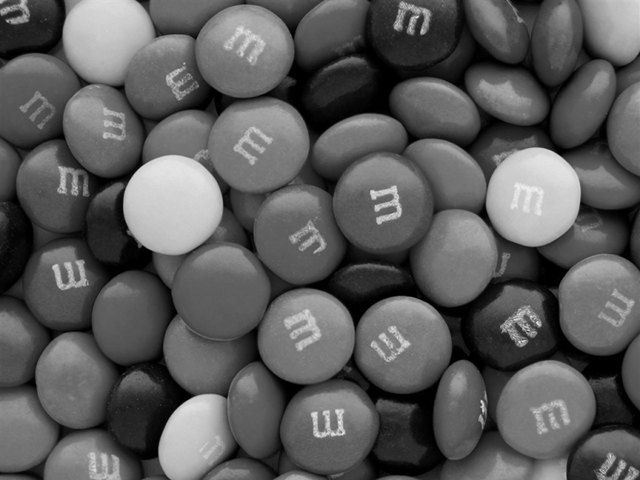

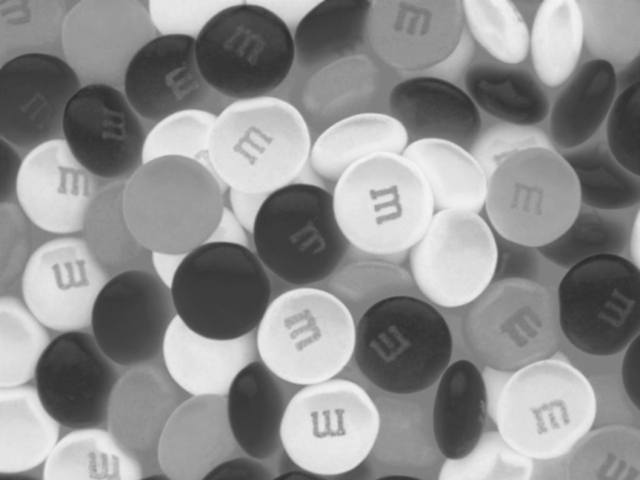

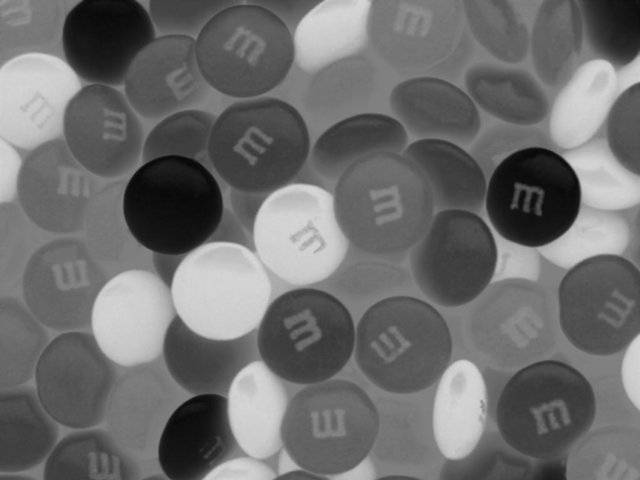

In [ ]:
ycrcb = cv2.cvtColor(src, cv2.COLOR_BGR2YCR_CB)
planes2 = cv2.split(ycrcb)
cv2_imshow(planes2[0]) # Y (밝기)
cv2_imshow(planes2[1]) # Cr (red)
cv2_imshow(planes2[2]) # Cb (blue)
cv2.waitKey()
cv2.destroyAllWindows()

## 히스토그램 분석

### 히스토그램(Histogram)
- 영상의 픽셀 값 분포를 그래프의 형태로 표현한 것
- 예를 들어 그레이스케일 영상에서 각 그레이스케일 값에 해당하는 픽셀의 개수를 구하고, 이를 막대 그래프의 형태로 표현

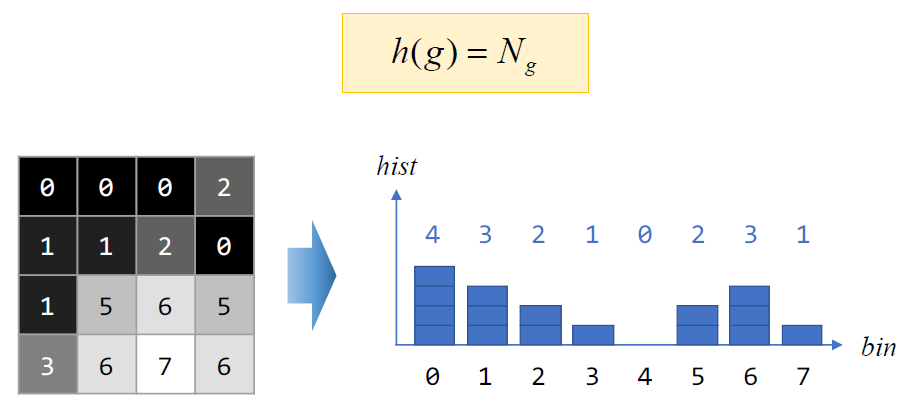

### 정규화 히스토그램(Normalized histogram)
- 각 픽셀의 개수를 영상 전체 픽셀 개수로 나누어준 것
- 해당 그레이스케일 값을 갖는 픽셀이 나타날 확률

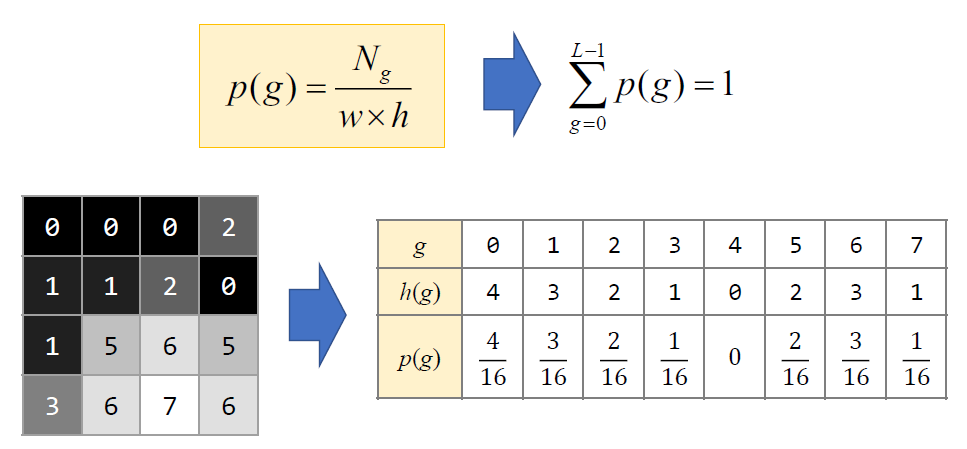

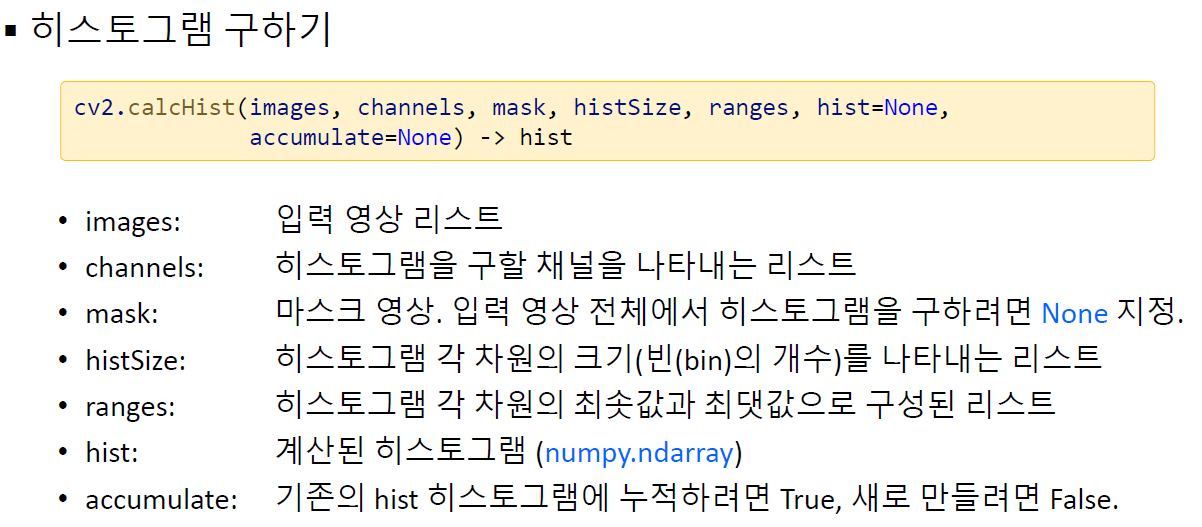

In [ ]:
# 그레이스케일 영상의 히스토그램
src = cv2.imread(bd+'lenna.bmp', cv2.IMREAD_GRAYSCALE)

if src is None:
    print("Image load failed")
    sys.exit()

In [ ]:
import matplotlib.pyplot as plt

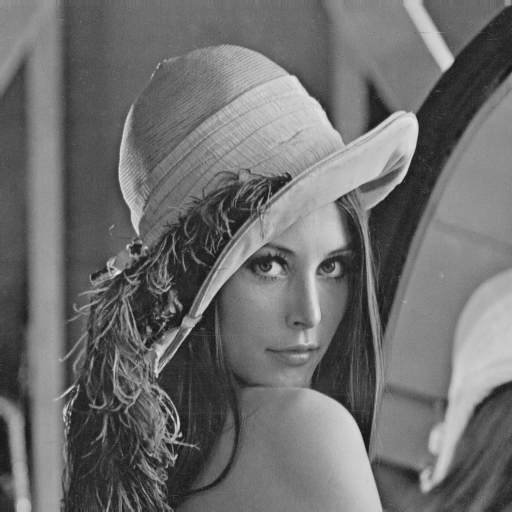

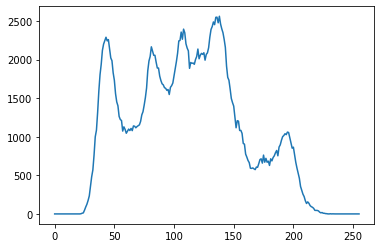

In [ ]:
hist = cv2.calcHist([src], [0], None, [256], [0, 256]) # 영상 1개도 리스트로 넣어야 한다.

cv2_imshow(src)
cv2.waitKey(1)

plt.plot(hist)
plt.show()

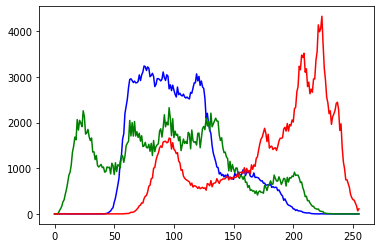

In [ ]:
# 컬러 영상의 히스토그램
src = cv2.imread(bd+'lenna.bmp')

if src is None:
    print('Image load failed')
    sys.exit()

colors = ['b', 'g', 'r']
bgr_planes = cv2.split(src)

for (p,c) in zip(bgr_planes, colors):
    hist = cv2.calcHist([p], [0], None, [256], [0, 256])
    plt.plot(hist, color=c)

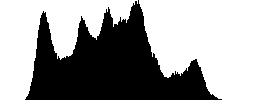

In [ ]:
# plt안쓰고 cv의 그리기 함수로 히스토그램 그리기
def getGrayHistImage(hist):
    imgHist = np.full((100, 256), 255, dtype=np.uint8)

    histMax = np.max(hist)
    for x in range(256):
        pt1 = (x, 100)
        pt2 = (x, 100 - int(hist[x, 0]*100/histMax))
        cv2.line(imgHist, pt1, pt2, 0) # imgHist에 pt1(x축에서 밑에점), pt2(x축에서 위에점)이어서 한줄한줄 라인을 그려줌

    return imgHist

src = cv2.imread(bd+'lenna.bmp', cv2.IMREAD_GRAYSCALE)

hist = cv2.calcHist([src], [0], None, [256], [0, 256])
histImg = getGrayHistImage(hist)
cv2_imshow(histImg)